# **Import Package**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
warnings.filterwarnings("ignore")
import seaborn as sns
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **Load Data**

In [3]:
df=pd.read_csv("AIML Dataset.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# **Modeling Data**

In [7]:
df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1, inplace=True)

In [8]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [9]:
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [10]:
# Normalisasi fitur numerik
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop("isFraud", axis=1)), columns=df.drop("isFraud", axis=1).columns)

In [11]:
df_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,0.75,0.000106,0.002855,0.003233,0.000000,0.0
1,0.0,0.75,0.000020,0.000357,0.000391,0.000000,0.0
2,0.0,1.00,0.000002,0.000003,0.000000,0.000000,0.0
3,0.0,0.25,0.000002,0.000003,0.000000,0.000059,0.0
4,0.0,0.75,0.000126,0.000697,0.000603,0.000000,0.0


In [12]:
# Tambahkan isFraud kembali, untuk nanti testing
df_scaled["isFraud"] = df["isFraud"].values
df_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0.0,0.75,0.000106,0.002855,0.003233,0.000000,0.0,0
1,0.0,0.75,0.000020,0.000357,0.000391,0.000000,0.0,0
2,0.0,1.00,0.000002,0.000003,0.000000,0.000000,0.0,1
3,0.0,0.25,0.000002,0.000003,0.000000,0.000059,0.0,1
4,0.0,0.75,0.000126,0.000697,0.000603,0.000000,0.0,0


In [13]:
df_train = df_scaled[df_scaled["isFraud"] == 0].drop("isFraud", axis=1)
df_train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.0,0.75,0.000106,0.002855,0.003233,0.0,0.0
1,0.0,0.75,0.000020,0.000357,0.000391,0.0,0.0
4,0.0,0.75,0.000126,0.000697,0.000603,0.0,0.0
5,0.0,0.75,0.000085,0.000904,0.000929,0.0,0.0
6,0.0,0.75,0.000077,0.003075,0.003551,0.0,0.0


In [14]:
df_train.value_counts()

step      type  amount    oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0.413747  0.75  0.000006  0.000000       0.0             0.000000        0.000000          2
0.336927  0.75  0.000123  0.000000       0.0             0.000000        0.000000          2
0.308625  0.75  0.000029  0.000000       0.0             0.000000        0.000000          2
0.339623  0.75  0.000072  0.000000       0.0             0.000000        0.000000          2
0.497305  0.75  0.000006  0.000000       0.0             0.000000        0.000000          2
                                                                                          ..
0.245283  0.25  0.003554  0.000000       0.0             0.001711        0.002633          1
                          0.000862       0.0             0.001232        0.002154          1
                0.003552  0.000000       0.0             0.010463        0.011380          1
                          0.000172       0.0             0.000108        0.

In [15]:
df_test = df_scaled.drop("isFraud", axis=1)
df_test.head()
df_test.count()

step              6362620
type              6362620
amount            6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
oldbalanceDest    6362620
newbalanceDest    6362620
dtype: int64

In [48]:
print(df_train.shape)
type(df_train.shape)

(6354407, 7)


tuple

In [49]:
df_train.shape[1]

7

# **training**

In [53]:
input_dim = df_train.shape[1]

# Build Autoencoder
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),  # Bottleneck
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

In [59]:
autoencoder.compile(optimizer=Adam(learning_rate=0.002), loss='mse')

# Train model
history = autoencoder.fit(df_train, df_train,
                          epochs=30,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=1)

Epoch 1/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 2.9848e-06 - val_loss: 0.0019
Epoch 2/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 1.3312e-06 - val_loss: 0.0022
Epoch 3/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 1.2027e-06 - val_loss: 0.0023
Epoch 4/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 1.1419e-06 - val_loss: 0.0025
Epoch 5/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 1.0835e-06 - val_loss: 0.0025
Epoch 6/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 1.0488e-06 - val_loss: 0.0025
Epoch 7/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 9.6862e-07 - val_loss: 0.0026
Epoch 8/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 9.1201e-07 - val_loss: 0.0027
Epoch 9/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 8.8447e-07 - val_loss: 0.0027
Epoch 10/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 8.7192e-07 - val_loss: 0.0027
Epoch 11/30
19858/19858 ━━━━━━━━━━━━━━━━━━━━ 35s 

# **Prediksi**

198832/198832 ━━━━━━━━━━━━━━━━━━━━ 156s 782us/step
MSE :  0          2.032979e-07
1          1.964075e-07
2          1.869588e-07
3          9.793883e-07
4          1.947397e-07
               ...     
6362615    3.085356e-02
6362616    2.532868e-02
6362617    2.879291e-02
6362618    2.831482e-02
6362619    3.048973e-02
Length: 6362620, dtype: float64


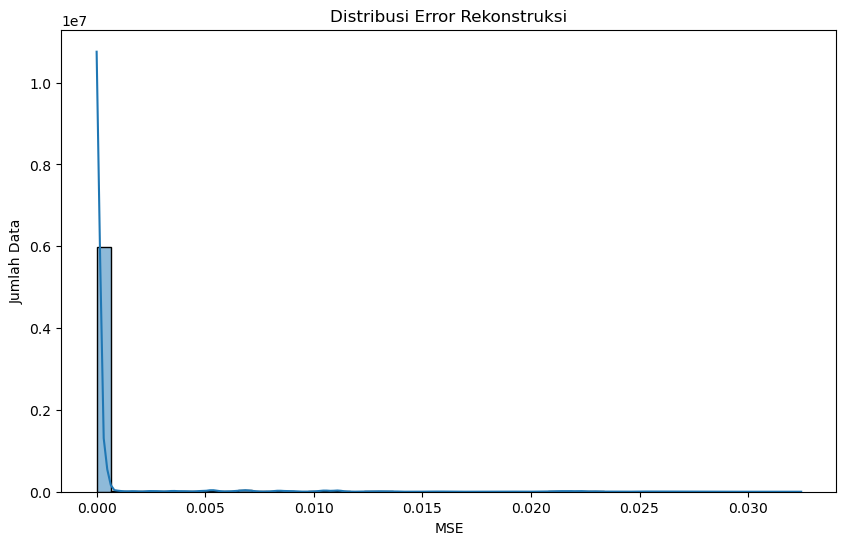

0.008397999514224999
Threshold Anomali: 0.008397999514224999


In [60]:
#ngetest pake forward propagation ke data test
reconstructions = autoencoder.predict(df_test)

#buat mse tiap baris dikurang 2 terus kuadrat
mse = np.mean(np.power(df_test - reconstructions, 2), axis=1)
print ("MSE : ",mse)

#gambar errornya saat ngebangun ulang si data input
plt.figure(figsize=(10,6))
sns.histplot(mse, bins=50, kde=True)
plt.title("Distribusi Error Rekonstruksi")
plt.xlabel("MSE")
plt.ylabel("Jumlah Data")
plt.show()


threshold = np.percentile(mse, 97)
print(threshold)
print("Threshold Anomali:", threshold)

In [61]:
# data anomali dari prediksi
anomalies = mse > threshold
print("Jumlah Anomali Terdeteksi:", np.sum(anomalies))

Jumlah Anomali Terdeteksi: 190879


In [62]:
#data fraud dari csv
true_labels = df_scaled["isFraud"].values
print(true_labels)
print((true_labels==1).sum())
print(anomalies)

[0 0 1 ... 1 1 1]
8213
0          False
1          False
2          False
3          False
4          False
           ...  
6362615     True
6362616     True
6362617     True
6362618     True
6362619     True
Length: 6362620, dtype: bool


In [63]:
cm = confusion_matrix(true_labels, anomalies)
accuracy = accuracy_score(true_labels, anomalies)
precision = precision_score(true_labels, anomalies)
recall = recall_score(true_labels, anomalies)
f1 = f1_score(true_labels, anomalies)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
 [[6165452  188955]
 [   6289    1924]]
Accuracy: 0.969313898991296
Precision: 0.010079683988285773
Recall: 0.23426275417021794
F1 Score: 0.01932774797581018


In [ ]:
#perbandingan data anomali dengan data sesungguhnya
labels = ['Prediksi', 'Asli']
values = [np.sum(anomalies), (df_scaled["isFraud"]==1).sum()]

plt.bar(labels, values, color=['orange', 'green'])
plt.ylabel('Jumlah')
plt.title('Fraud Prediksi vs Fraud Asli')
plt.show()

In [ ]:
#Anomaly index
anomaly_indices = np.where(anomalies)[0]

# Berapa anomaly yang memang fraud
true_positive = df.iloc[anomaly_indices]["isFraud"].sum()

print(f"Anomali yang benar-benar fraud: {true_positive} dari {np.sum(anomalies)} anomaly terdeteksi")

In [ ]:
df_result = df_scaled.copy()
df_result["reconstruction_error"] = mse
df_result["is_anomaly"] = anomalies

# Lihat data anomaly saja
df_anomalies = df_result[df_result["is_anomaly"] == True]
print(df_anomalies.head())